In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import mnist

이미지 데이터셋 로딩

In [ ]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
print('X_train shape: '+ str(X_train.shape))
print('y_train shape: '+ str(y_train.shape))
print('X_test shape: '+ str(X_test.shape))
print('y_test shape: '+ str(y_test.shape))

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


테스트할 샘플 하나 확인

Text(0.5, 1.0, '7')

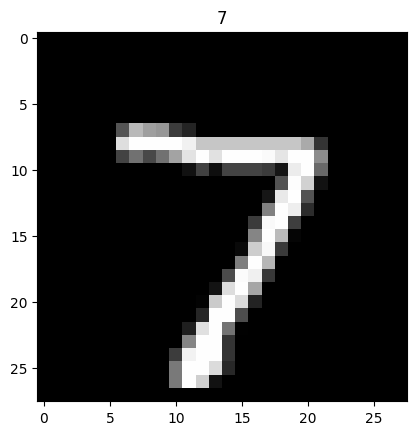

In [ ]:
plt.imshow(X_test[0], cmap = 'gray')
plt.title(y_test[0])

이미지와 라벨을 같이 plot

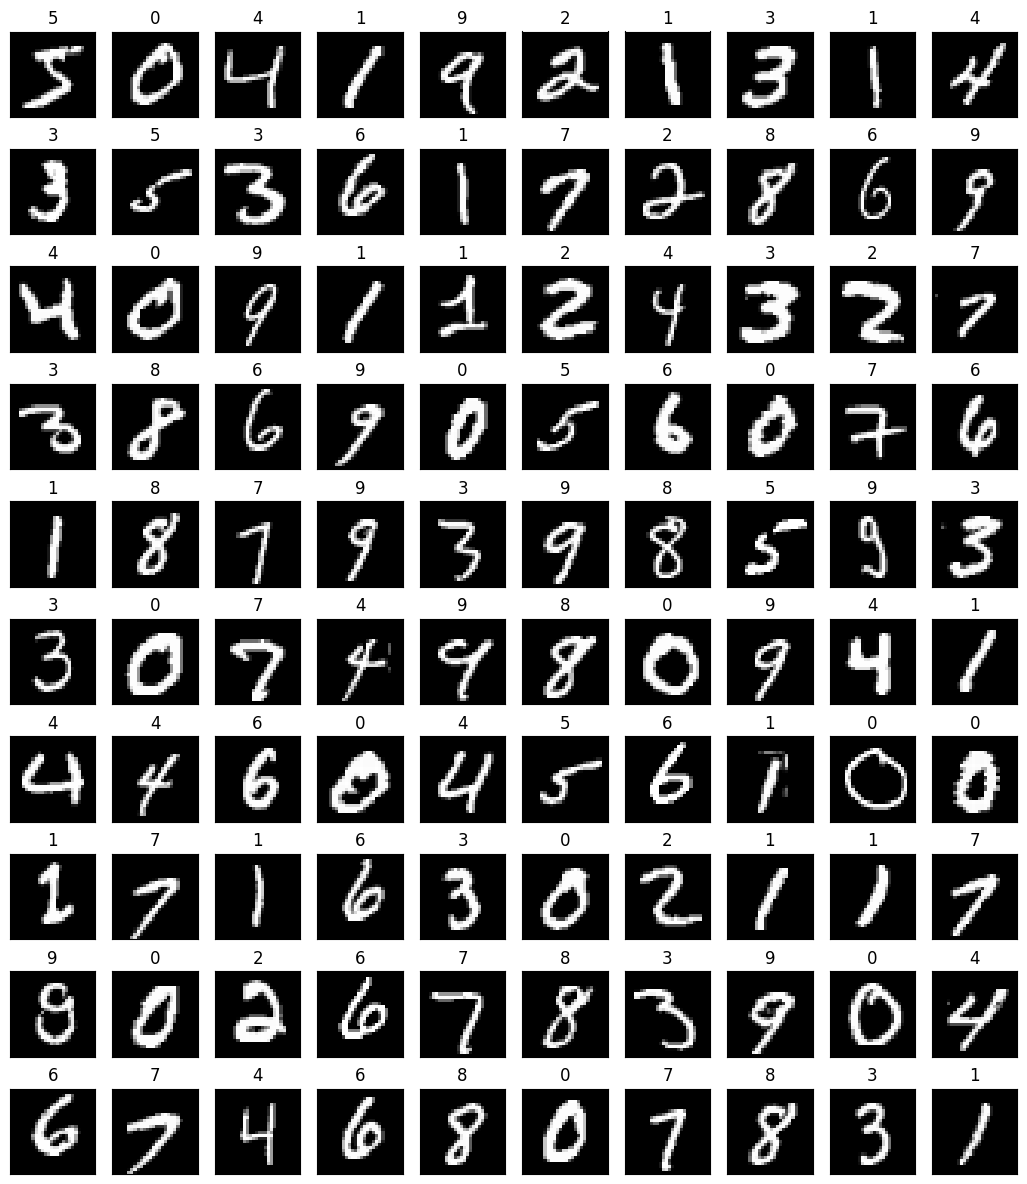

In [ ]:
fig, axes = plt.subplots(nrows = 10, ncols = 10, figsize = (13,15), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i],cmap = 'gray')
    title = str(y_train[i])
    ax.set_title(title)

plt.show()

## 전처리 수행
* 데이터 전처리
    * 3차원(샘플수,세로,가로)를 4차원(샘플수,세로,가로,채널)으로 변경
    * 정수를 실수로 변경
    * 0\~255 사이의 수치를 0.0~1.0 사이로 정규화
* 라벨 저처리
    * 0~0라벨에 대해 원핫 인코딩 수행

In [ ]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')/255.0
X_test = X_test.reshape(10000,28,28,1).astype('float32')/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 모델 구성
* 입력: 3차원 벡터 (세로 28, 가로 28, 채널 1)
* 출력: 10개 벡터
* 출력층의 활성화 함수: softmax (다중 분류)
* 손실함수: categorical_crossentropy
* 최적화기: adam
* 평가 metric: accuracy

In [ ]:
model = Sequential([
    Conv2D(32,(3,3), padding = 'same', input_shape = (28,28,1), activation = 'relu'),
    Conv2D(32,(3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

모델 아키텍처 구성 확인

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

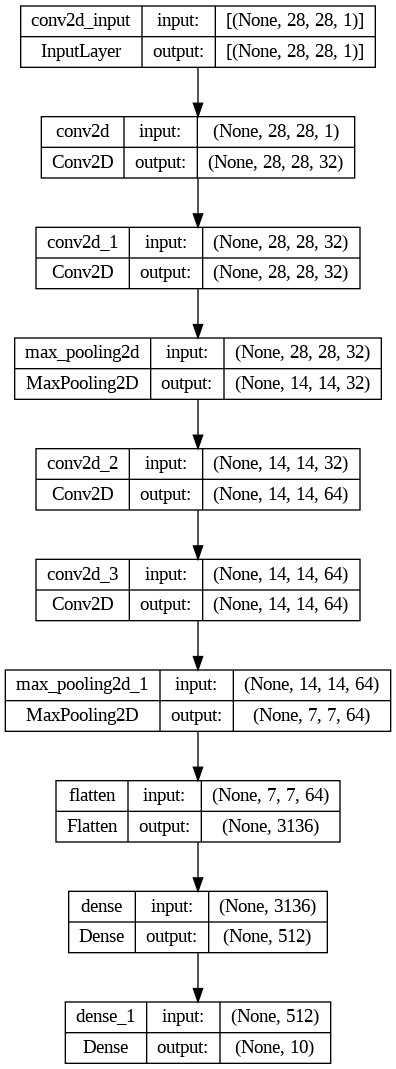

In [ ]:
plot_model(model, show_shapes = True)

callback함수를 사용해서 최적 모델을 저장

In [ ]:
checkpoint_callback = ModelCheckpoint('best_model.h5', save_best_only = True, monitor = 'val_loss')

hist = model.fit(X_train, y_train, validation_split = 0.2, batch_size = 32, epochs = 100, callbacks = [checkpoint_callback])

Epoch 1/100
1500/1500 [==============================] - 23s 5ms/step - loss: 0.1157 - accuracy: 0.9649 - val_loss: 0.0564 - val_accuracy: 0.9833
Epoch 2/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0441 - val_accuracy: 0.9867
Epoch 3/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.0439 - val_accuracy: 0.9894
Epoch 4/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.0355 - val_accuracy: 0.9893
Epoch 5/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0417 - val_accuracy: 0.9887
Epoch 6/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 0.0317 - val_accuracy: 0.9920
Epoch 7/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0363 - val_a

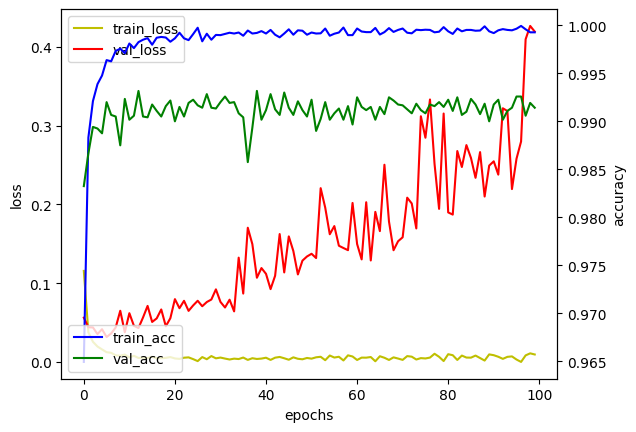

In [ ]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val_loss')

acc_ax.plot(hist.history['accuracy'], 'b', label = 'train_acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val_acc')

loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

파일로 저장된 최적 모델을 로딩해서 시험셋에 적용하여 평가 수행

In [ ]:
model = load_model('best_model.h5')

test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test Accuracy', test_acc)
print('Test Loss', test_loss)

313/313 [==============================] - 2s 4ms/step - loss: 0.0236 - accuracy: 0.9927
Test Accuracy 0.9926999807357788
Test Loss 0.023642349988222122
